# Assignment 8

You must clarify (in markdown cells) what information is contained in the graph and how you are measuring it
Also include a description (via markdown cells) of the network's density and the "most important" nodes
You can choose what "most important" means, but use a quantitative metric and include this metric's value(s) in your description
Tailor the graph's aesthetics to enhance the visualization


In [1]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [2]:
_send_jupyter_config_comm_request()

In [4]:
JupyterDash.infer_jupyter_proxy_config()

In [5]:
nodelist = [1,2,3,4,5,6]
edgelist = [(1,2),(1,3),(1,4),(1,5),(1,6),(2,3)]

graphitems = []

for i in nodelist:
    dashnode = {'data': {'id': str(i), 'label': str(i)}}
    graphitems.append(dashnode)

for i in edgelist:
    dashedge = {'data': {'source': str(i[0]), 'target': str(i[1])}}
    graphitems.append(dashedge)

In [6]:
graphitems

[{'data': {'id': '1', 'label': '1'}},
 {'data': {'id': '2', 'label': '2'}},
 {'data': {'id': '3', 'label': '3'}},
 {'data': {'id': '4', 'label': '4'}},
 {'data': {'id': '5', 'label': '5'}},
 {'data': {'id': '6', 'label': '6'}},
 {'data': {'source': '1', 'target': '2'}},
 {'data': {'source': '1', 'target': '3'}},
 {'data': {'source': '1', 'target': '4'}},
 {'data': {'source': '1', 'target': '5'}},
 {'data': {'source': '1', 'target': '6'}},
 {'data': {'source': '2', 'target': '3'}}]

In [7]:
app = JupyterDash(__name__)

In [8]:
app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems
    )
])

In [9]:
app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


In [10]:
app = JupyterDash(__name__)

app.layout = html.Div([

    dcc.Dropdown(
        id='dropdown-update-layout',
        value='cose',
        options=[
            {'label': 'Grid', 'value': 'grid'},
            {'label': 'Random', 'value': 'random'},
            {'label': 'Circle', 'value': 'circle'},
            {'label': 'Cose', 'value': 'cose'},
            {'label': 'Concentric', 'value': 'concentric'}
        ]
    ),
    cyto.Cytoscape(
        id='cytoscape-compound',
        layout={'name': 'cose'},
        elements=graphitems
    )
])

@app.callback(Output('cytoscape-compound', 'layout'),
              Input('dropdown-update-layout', 'value'))
def update_layout(layout):
    return {'name': layout}

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


/opt/conda/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()


In [11]:
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='dropdown-update-layout',
        value='cose',
        options=[
            {'label': 'Grid', 'value': 'grid'},
            {'label': 'Random', 'value': 'random'},
            {'label': 'Circle', 'value': 'circle'},
            {'label': 'Cose', 'value': 'cose'},
            {'label': 'Concentric', 'value': 'concentric'}
        ]
    ),
    cyto.Cytoscape(
        id='cytoscape-compound',
        layout={'name': 'cose'},
        elements=graphitems,
        
        # adding in some styling with css-like stylesheet
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'background-color': 'red',
                    'content': 'data(label)',
                }
            },
        ]
    )
])

@app.callback(Output('cytoscape-compound', 'layout'),
              Input('dropdown-update-layout', 'value'))
def update_layout(layout):
    return {'name': layout}

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


# Hamlet

In [25]:
with open('hamlet.txt') as f:
    x = f.read()

In [26]:
x

'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK\n\nby William Shakespeare\n\n\nContents\n\nACT I\nScene I. Elsinore. A platform before the Castle.\nScene II. Elsinore. A room of state in the Castle\nScene III. A room in Polonius’s house.\nScene IV. The platform.\nScene V. A more remote part of the Castle.\n\nACT II\nScene I. A room in Polonius’s house.\nScene II. A room in the Castle.\n\nACT III\nScene I. A room in the Castle.\nScene II. A hall in the Castle.\nScene III. A room in the Castle.\nScene IV. Another room in the Castle.\n\nACT IV\nScene I. A room in the Castle.\nScene II. Another room in the Castle.\nScene III. Another room in the Castle.\nScene IV. A plain in Denmark.\nScene V. Elsinore. A room in the Castle.\nScene VI. Another room in the Castle.\nScene VII. Another room in the Castle.\n\nACT V\nScene I. A churchyard.\nScene II. A hall in the Castle.\n\n\nDramatis Personæ\n\nHAMLET, Prince of Denmark.\nCLAUDIUS, King of Denmark, Hamlet’s uncle.\nThe GHOST of the late king, Hamle

In [27]:
x.split('Act')[1].split('SCENE')[1]

' VI. Another room in the Castle.\n\n Enter Horatio and a Servant.\n\nHORATIO. What are they that would speak with me?\n\nSERVANT. Sailors, sir. They say they have letters for you.\n\nHORATIO. Let them come in.\n\n [_Exit Servant._]\n\nI do not know from what part of the world I should be greeted, if not\nfrom Lord Hamlet.\n\n Enter Sailors.\n\nFIRST SAILOR. God bless you, sir.\n\nHORATIO. Let him bless thee too.\n\nFIRST SAILOR. He shall, sir, and’t please him. There’s a letter for\nyou, sir. It comes from th’ambassador that was bound for England; if\nyour name be Horatio, as I am let to know it is.\n\nHORATIO. [_Reads._] ‘Horatio, when thou shalt have overlooked this,\ngive these fellows some means to the King. They have letters for him.\nEre we were two days old at sea, a pirate of very warlike appointment\ngave us chase. Finding ourselves too slow of sail, we put on a\ncompelled valour, and in the grapple I boarded them. On the instant\nthey got clear of our ship, so I alone became

In [82]:
acts = x.split('ACT')[5:]

In [83]:
acts[-1]

' V\n\nSCENE I. A churchyard.\n\n Enter two Clowns with spades, &c.\n\nFIRST CLOWN. Is she to be buried in Christian burial, when she wilfully\nseeks her own salvation?\n\nSECOND CLOWN. I tell thee she is, and therefore make her grave\nstraight. The crowner hath sat on her, and finds it Christian burial.\n\nFIRST CLOWN. How can that be, unless she drowned herself in her own\ndefence?\n\nSECOND CLOWN. Why, ’tis found so.\n\nFIRST CLOWN. It must be _se offendendo_, it cannot be else. For here\nlies the point: if I drown myself wittingly, it argues an act: and an\nact hath three branches. It is to act, to do, and to perform: argal,\nshe drowned herself wittingly.\n\nSECOND CLOWN. Nay, but hear you, goodman delver,—\n\nFIRST CLOWN. Give me leave. Here lies the water; good. Here stands the\nman; good. If the man go to this water and drown himself, it is, will\nhe nill he, he goes,—mark you that. But if the water come to him and\ndrown him, he drowns not himself. Argal, he that is not guilty

In [84]:
acts[1].split('SCENE')[-1]

' V. A more remote part of the Castle.\n\n Enter Ghost and Hamlet.\n\nHAMLET. Whither wilt thou lead me? Speak, I’ll go no further.\n\nGHOST. Mark me.\n\nHAMLET. I will.\n\nGHOST. My hour is almost come, When I to sulph’rous and tormenting\nflames Must render up myself.\n\nHAMLET. Alas, poor ghost!\n\nGHOST. Pity me not, but lend thy serious hearing To what I shall\nunfold.\n\nHAMLET. Speak, I am bound to hear.\n\nGHOST. So art thou to revenge, when thou shalt hear.\n\nHAMLET. What?\n\nGHOST. I am thy father’s spirit, Doom’d for a certain term to walk the\nnight, And for the day confin’d to fast in fires, Till the foul crimes\ndone in my days of nature Are burnt and purg’d away. But that I am\nforbid To tell the secrets of my prison-house, I could a tale unfold\nwhose lightest word Would harrow up thy soul; freeze thy young blood,\nMake thy two eyes like stars start from their spheres, Thy knotted and\ncombined locks to part, And each particular hair to stand on end Like\nquills upon t

In [85]:
acts[1].split('SCENE')[-1].find('HAMLET')

65

In [86]:
characters = ['HAMLET', 'QUEEN GERTRUDE', 'KING CLAUDIUS', 'OPHELIA', 'LAERTES', 'POLONIUS','REYNALDO', 'HORATIO', 'VOLTEMAND', 'CORNELIUS', 'ROSENCRANTZ', 'GUILDENSTERN', 'OSRIC', 'GENTLEMAN', 'FRANCISCO', 'BARNARDO', 'MARCELLUS', 'FORTINBRAS', 'LORDS']

In [87]:
len(acts)

6

In [88]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [89]:
charnum

{'HAMLET': 15,
 'QUEEN GERTRUDE': 0,
 'KING CLAUDIUS': 0,
 'OPHELIA': 5,
 'LAERTES': 6,
 'POLONIUS': 8,
 'REYNALDO': 1,
 'HORATIO': 8,
 'VOLTEMAND': 2,
 'CORNELIUS': 1,
 'ROSENCRANTZ': 7,
 'GUILDENSTERN': 5,
 'OSRIC': 1,
 'GENTLEMAN': 1,
 'FRANCISCO': 1,
 'BARNARDO': 2,
 'MARCELLUS': 4,
 'FORTINBRAS': 2,
 'LORDS': 1}

In [90]:
connections

{('HAMLET', 'QUEEN GERTRUDE'): 0,
 ('HAMLET', 'KING CLAUDIUS'): 0,
 ('HAMLET', 'OPHELIA'): 2,
 ('HAMLET', 'LAERTES'): 4,
 ('HAMLET', 'POLONIUS'): 6,
 ('HAMLET', 'REYNALDO'): 0,
 ('HAMLET', 'HORATIO'): 7,
 ('HAMLET', 'VOLTEMAND'): 2,
 ('HAMLET', 'CORNELIUS'): 1,
 ('HAMLET', 'ROSENCRANTZ'): 7,
 ('HAMLET', 'GUILDENSTERN'): 5,
 ('HAMLET', 'OSRIC'): 1,
 ('HAMLET', 'GENTLEMAN'): 0,
 ('HAMLET', 'FRANCISCO'): 0,
 ('HAMLET', 'BARNARDO'): 1,
 ('HAMLET', 'MARCELLUS'): 3,
 ('HAMLET', 'FORTINBRAS'): 2,
 ('HAMLET', 'LORDS'): 1,
 ('QUEEN GERTRUDE', 'KING CLAUDIUS'): 0,
 ('QUEEN GERTRUDE', 'OPHELIA'): 0,
 ('QUEEN GERTRUDE', 'LAERTES'): 0,
 ('QUEEN GERTRUDE', 'POLONIUS'): 0,
 ('QUEEN GERTRUDE', 'REYNALDO'): 0,
 ('QUEEN GERTRUDE', 'HORATIO'): 0,
 ('QUEEN GERTRUDE', 'VOLTEMAND'): 0,
 ('QUEEN GERTRUDE', 'CORNELIUS'): 0,
 ('QUEEN GERTRUDE', 'ROSENCRANTZ'): 0,
 ('QUEEN GERTRUDE', 'GUILDENSTERN'): 0,
 ('QUEEN GERTRUDE', 'OSRIC'): 0,
 ('QUEEN GERTRUDE', 'GENTLEMAN'): 0,
 ('QUEEN GERTRUDE', 'FRANCISCO'): 0,
 (

In [91]:
for k,v in charnum.items():
    print(k,v)

HAMLET 15
QUEEN GERTRUDE 0
KING CLAUDIUS 0
OPHELIA 5
LAERTES 6
POLONIUS 8
REYNALDO 1
HORATIO 8
VOLTEMAND 2
CORNELIUS 1
ROSENCRANTZ 7
GUILDENSTERN 5
OSRIC 1
GENTLEMAN 1
FRANCISCO 1
BARNARDO 2
MARCELLUS 4
FORTINBRAS 2
LORDS 1


In [92]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
graphitems

[{'data': {'id': 'HAMLET', 'label': 'Hamlet', 'size': '15'}},
 {'data': {'id': 'QUEEN GERTRUDE', 'label': 'Queen Gertrude', 'size': '0'}},
 {'data': {'id': 'KING CLAUDIUS', 'label': 'King Claudius', 'size': '0'}},
 {'data': {'id': 'OPHELIA', 'label': 'Ophelia', 'size': '5'}},
 {'data': {'id': 'LAERTES', 'label': 'Laertes', 'size': '6'}},
 {'data': {'id': 'POLONIUS', 'label': 'Polonius', 'size': '8'}},
 {'data': {'id': 'REYNALDO', 'label': 'Reynaldo', 'size': '1'}},
 {'data': {'id': 'HORATIO', 'label': 'Horatio', 'size': '8'}},
 {'data': {'id': 'VOLTEMAND', 'label': 'Voltemand', 'size': '2'}},
 {'data': {'id': 'CORNELIUS', 'label': 'Cornelius', 'size': '1'}},
 {'data': {'id': 'ROSENCRANTZ', 'label': 'Rosencrantz', 'size': '7'}},
 {'data': {'id': 'GUILDENSTERN', 'label': 'Guildenstern', 'size': '5'}},
 {'data': {'id': 'OSRIC', 'label': 'Osric', 'size': '1'}},
 {'data': {'id': 'GENTLEMAN', 'label': 'Gentleman', 'size': '1'}},
 {'data': {'id': 'FRANCISCO', 'label': 'Francisco', 'size': '1'

In [93]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems

[{'data': {'id': 'HAMLET', 'label': 'Hamlet', 'size': '15'}},
 {'data': {'id': 'QUEEN GERTRUDE', 'label': 'Queen Gertrude', 'size': '0'}},
 {'data': {'id': 'KING CLAUDIUS', 'label': 'King Claudius', 'size': '0'}},
 {'data': {'id': 'OPHELIA', 'label': 'Ophelia', 'size': '5'}},
 {'data': {'id': 'LAERTES', 'label': 'Laertes', 'size': '6'}},
 {'data': {'id': 'POLONIUS', 'label': 'Polonius', 'size': '8'}},
 {'data': {'id': 'REYNALDO', 'label': 'Reynaldo', 'size': '1'}},
 {'data': {'id': 'HORATIO', 'label': 'Horatio', 'size': '8'}},
 {'data': {'id': 'VOLTEMAND', 'label': 'Voltemand', 'size': '2'}},
 {'data': {'id': 'CORNELIUS', 'label': 'Cornelius', 'size': '1'}},
 {'data': {'id': 'ROSENCRANTZ', 'label': 'Rosencrantz', 'size': '7'}},
 {'data': {'id': 'GUILDENSTERN', 'label': 'Guildenstern', 'size': '5'}},
 {'data': {'id': 'OSRIC', 'label': 'Osric', 'size': '1'}},
 {'data': {'id': 'GENTLEMAN', 'label': 'Gentleman', 'size': '1'}},
 {'data': {'id': 'FRANCISCO', 'label': 'Francisco', 'size': '1'

In [94]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


In [95]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


In [96]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'blue',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(str(int(weight)/10))',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


In [97]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)

7


In [98]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'red',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/


In [99]:
graphitems

[{'data': {'id': 'HAMLET', 'label': 'Hamlet', 'size': '15'}},
 {'data': {'id': 'QUEEN GERTRUDE', 'label': 'Queen Gertrude', 'size': '0'}},
 {'data': {'id': 'KING CLAUDIUS', 'label': 'King Claudius', 'size': '0'}},
 {'data': {'id': 'OPHELIA', 'label': 'Ophelia', 'size': '5'}},
 {'data': {'id': 'LAERTES', 'label': 'Laertes', 'size': '6'}},
 {'data': {'id': 'POLONIUS', 'label': 'Polonius', 'size': '8'}},
 {'data': {'id': 'REYNALDO', 'label': 'Reynaldo', 'size': '1'}},
 {'data': {'id': 'HORATIO', 'label': 'Horatio', 'size': '8'}},
 {'data': {'id': 'VOLTEMAND', 'label': 'Voltemand', 'size': '2'}},
 {'data': {'id': 'CORNELIUS', 'label': 'Cornelius', 'size': '1'}},
 {'data': {'id': 'ROSENCRANTZ', 'label': 'Rosencrantz', 'size': '7'}},
 {'data': {'id': 'GUILDENSTERN', 'label': 'Guildenstern', 'size': '5'}},
 {'data': {'id': 'OSRIC', 'label': 'Osric', 'size': '1'}},
 {'data': {'id': 'GENTLEMAN', 'label': 'Gentleman', 'size': '1'}},
 {'data': {'id': 'FRANCISCO', 'label': 'Francisco', 'size': '1'

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

In [101]:
nxgraphitems = []

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('HAMLET', 'OPHELIA'),
 ('HAMLET', 'LAERTES'),
 ('HAMLET', 'POLONIUS'),
 ('HAMLET', 'HORATIO'),
 ('HAMLET', 'VOLTEMAND'),
 ('HAMLET', 'CORNELIUS'),
 ('HAMLET', 'ROSENCRANTZ'),
 ('HAMLET', 'GUILDENSTERN'),
 ('HAMLET', 'OSRIC'),
 ('HAMLET', 'BARNARDO'),
 ('HAMLET', 'MARCELLUS'),
 ('HAMLET', 'FORTINBRAS'),
 ('HAMLET', 'LORDS'),
 ('OPHELIA', 'LAERTES'),
 ('OPHELIA', 'POLONIUS'),
 ('OPHELIA', 'REYNALDO'),
 ('OPHELIA', 'HORATIO'),
 ('OPHELIA', 'ROSENCRANTZ'),
 ('OPHELIA', 'GUILDENSTERN'),
 ('OPHELIA', 'GENTLEMAN'),
 ('LAERTES', 'POLONIUS'),
 ('LAERTES', 'HORATIO'),
 ('LAERTES', 'VOLTEMAND'),
 ('LAERTES', 'CORNELIUS'),
 ('LAERTES', 'OSRIC'),
 ('LAERTES', 'GENTLEMAN'),
 ('LAERTES', 'BARNARDO'),
 ('LAERTES', 'MARCELLUS'),
 ('LAERTES', 'FORTINBRAS'),
 ('LAERTES', 'LORDS'),
 ('POLONIUS', 'REYNALDO'),
 ('POLONIUS', 'HORATIO'),
 ('POLONIUS', 'VOLTEMAND'),
 ('POLONIUS', 'CORNELIUS'),
 ('POLONIUS', 'ROSENCRANTZ'),
 ('POLONIUS', 'GUILDENSTERN'),
 ('POLONIUS', 'BARNARDO'),
 ('POLONIUS', 'MARCELLUS'),


In [102]:
G = nx.Graph()

In [103]:
G.add_edges_from(nxgraphitems)

In [104]:
G.nodes

NodeView(('HAMLET', 'OPHELIA', 'LAERTES', 'POLONIUS', 'HORATIO', 'VOLTEMAND', 'CORNELIUS', 'ROSENCRANTZ', 'GUILDENSTERN', 'OSRIC', 'BARNARDO', 'MARCELLUS', 'FORTINBRAS', 'LORDS', 'REYNALDO', 'GENTLEMAN', 'FRANCISCO'))

In [105]:
nx.degree_centrality(G)

{'HAMLET': 0.8125,
 'OPHELIA': 0.5,
 'LAERTES': 0.75,
 'POLONIUS': 0.6875,
 'HORATIO': 0.875,
 'VOLTEMAND': 0.5625,
 'CORNELIUS': 0.4375,
 'ROSENCRANTZ': 0.4375,
 'GUILDENSTERN': 0.375,
 'OSRIC': 0.3125,
 'BARNARDO': 0.5,
 'MARCELLUS': 0.5,
 'FORTINBRAS': 0.375,
 'LORDS': 0.3125,
 'REYNALDO': 0.125,
 'GENTLEMAN': 0.125,
 'FRANCISCO': 0.1875}

In [106]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Horatio        : 0.875
Hamlet         : 0.812
Laertes        : 0.750
Polonius       : 0.688
Voltemand      : 0.562
Ophelia        : 0.500
Barnardo       : 0.500
Marcellus      : 0.500
Cornelius      : 0.438
Rosencrantz    : 0.438
Guildenstern   : 0.375
Fortinbras     : 0.375
Osric          : 0.312
Lords          : 0.312
Francisco      : 0.188
Reynaldo       : 0.125
Gentleman      : 0.125


In [107]:
list(G.neighbors('HAMLET'))

['OPHELIA',
 'LAERTES',
 'POLONIUS',
 'HORATIO',
 'VOLTEMAND',
 'CORNELIUS',
 'ROSENCRANTZ',
 'GUILDENSTERN',
 'OSRIC',
 'BARNARDO',
 'MARCELLUS',
 'FORTINBRAS',
 'LORDS']

In [108]:
nx.shortest_path(G,'HAMLET','HORATIO')

['HAMLET', 'HORATIO']

In [109]:
nx.betweenness_centrality(G)

{'HAMLET': 0.09541666666666668,
 'OPHELIA': 0.07805555555555556,
 'LAERTES': 0.14027777777777778,
 'POLONIUS': 0.0961111111111111,
 'HORATIO': 0.1676388888888889,
 'VOLTEMAND': 0.015555555555555555,
 'CORNELIUS': 0.0,
 'ROSENCRANTZ': 0.0125,
 'GUILDENSTERN': 0.0013888888888888887,
 'OSRIC': 0.0,
 'BARNARDO': 0.018055555555555557,
 'MARCELLUS': 0.018055555555555557,
 'FORTINBRAS': 0.006944444444444444,
 'LORDS': 0.0,
 'REYNALDO': 0.0,
 'GENTLEMAN': 0.0,
 'FRANCISCO': 0.0}

In [110]:
dc = nx.betweenness_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Horatio        : 0.168
Laertes        : 0.140
Polonius       : 0.096
Hamlet         : 0.095
Ophelia        : 0.078
Barnardo       : 0.018
Marcellus      : 0.018
Voltemand      : 0.016
Rosencrantz    : 0.013
Fortinbras     : 0.007
Guildenstern   : 0.001
Cornelius      : 0.000
Osric          : 0.000
Lords          : 0.000
Reynaldo       : 0.000
Gentleman      : 0.000
Francisco      : 0.000


In [125]:
from networkx.algorithms.community.centrality import girvan_newman

In [126]:
communities = girvan_newman(G)

[['REYNALDO', 'OPHELIA', 'CORNELIUS', 'FORTINBRAS', 'BARNARDO', 'HAMLET', 'LORDS', 'LAERTES', 'POLONIUS', 'ROSENCRANTZ', 'FRANCISCO', 'MARCELLUS', 'OSRIC', 'GUILDENSTERN', 'HORATIO', 'VOLTEMAND'], ['GENTLEMAN']]


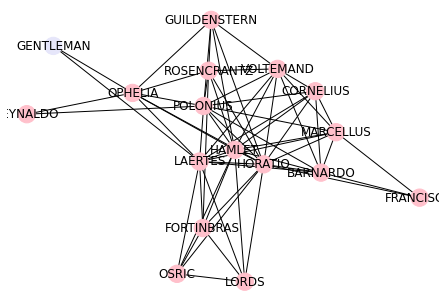

In [127]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    else:
        color_map.append('lavender')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

THis is graphing the connections all the the characters have and how many times the appear in the act together. The ones with the least amount of connections are in purple whereas those with many connections are pink.

In [114]:
nx.density(G)

0.4632352941176471

In [115]:
from networkx.algorithms.community import greedy_modularity_communities

In [72]:
greedy_modularity_communities(G)

[frozenset({'FORTINBRAS', 'GENTLEMAN', 'HAMLET', 'LAERTES', 'LORDS', 'OSRIC'}),
 frozenset({'BARNARDO',
            'CORNELIUS',
            'FRANCISCO',
            'HORATIO',
            'MARCELLUS',
            'VOLTEMAND'}),
 frozenset({'GUILDENSTERN', 'OPHELIA', 'POLONIUS', 'REYNALDO', 'ROSENCRANTZ'})]

In [73]:
communities = greedy_modularity_communities(G)
modularity_class = {}
for community_number, community in enumerate(communities):
    for name in community:
        modularity_class[name] = community_number

In [74]:
modularity_class

{'FORTINBRAS': 0,
 'LORDS': 0,
 'HAMLET': 0,
 'LAERTES': 0,
 'OSRIC': 0,
 'GENTLEMAN': 0,
 'CORNELIUS': 1,
 'BARNARDO': 1,
 'FRANCISCO': 1,
 'MARCELLUS': 1,
 'HORATIO': 1,
 'VOLTEMAND': 1,
 'REYNALDO': 2,
 'OPHELIA': 2,
 'POLONIUS': 2,
 'ROSENCRANTZ': 2,
 'GUILDENSTERN': 2}

[['FORTINBRAS', 'LORDS', 'HAMLET', 'LAERTES', 'OSRIC', 'GENTLEMAN'], ['CORNELIUS', 'BARNARDO', 'FRANCISCO', 'MARCELLUS', 'HORATIO', 'VOLTEMAND'], ['REYNALDO', 'OPHELIA', 'POLONIUS', 'ROSENCRANTZ', 'GUILDENSTERN']]


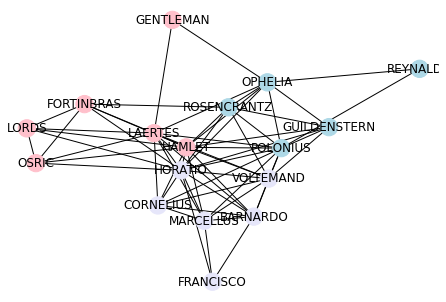

In [122]:
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    elif node in node_groups[1]:
        color_map.append('lavender')
    else:
        color_map.append('lightblue')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [76]:
graphitems = []

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'green'
    else:
        modularity = 'red'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

7


[{'data': {'id': 'HAMLET',
   'label': 'Hamlet',
   'size': '15',
   'modularity': 'blue'}},
 {'data': {'id': 'QUEEN GERTRUDE',
   'label': 'Queen Gertrude',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'KING CLAUDIUS',
   'label': 'King Claudius',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'OPHELIA',
   'label': 'Ophelia',
   'size': '5',
   'modularity': 'red'}},
 {'data': {'id': 'LAERTES',
   'label': 'Laertes',
   'size': '6',
   'modularity': 'blue'}},
 {'data': {'id': 'POLONIUS',
   'label': 'Polonius',
   'size': '8',
   'modularity': 'red'}},
 {'data': {'id': 'REYNALDO',
   'label': 'Reynaldo',
   'size': '1',
   'modularity': 'red'}},
 {'data': {'id': 'HORATIO',
   'label': 'Horatio',
   'size': '8',
   'modularity': 'green'}},
 {'data': {'id': 'VOLTEMAND',
   'label': 'Voltemand',
   'size': '2',
   'modularity': 'green'}},
 {'data': {'id': 'CORNELIUS',
   'label': 'Cornelius',
   'size': '1',
   'modularity': 'green'}},
 {'data': {'id': 'ROSENCR

In [77]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

/opt/conda/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()


Dash app running on https://jupyter.idre.ucla.edu/user/carolcheng25@gmail.com/proxy/8050/
